#### 한글 글꼴 설치

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

- 런타임 재실행

#### 파일 업로드 및 압축 해제

In [2]:
# 파일 업로드
from google.colab import files
unloaded=files.upload()

Saving weather.zip to weather.zip


In [3]:
# 폴더 생성
!mkdir weather

In [4]:
# zip 파일 압축 해제
!unzip weather.zip -d ./weather  # weather.zip을 weather 폴더에 압축 해제

Archive:  weather.zip
기상청_URL.txt:  mismatching "local" filename (ъ╕░ьГБь▓н_URL.txt),
         continuing with "central" filename version
 extracting: ./weather/기상청_URL.txt  
부산_1904_1913.csv:  mismatching "local" filename (ы╢АьВ░_1904_1913.csv),
         continuing with "central" filename version
  inflating: ./weather/부산_1904_1913.csv  
부산_1914_1923.csv:  mismatching "local" filename (ы╢АьВ░_1914_1923.csv),
         continuing with "central" filename version
  inflating: ./weather/부산_1914_1923.csv  
부산_1924_1933.csv:  mismatching "local" filename (ы╢АьВ░_1924_1933.csv),
         continuing with "central" filename version
  inflating: ./weather/부산_1924_1933.csv  
부산_1934_1943.csv:  mismatching "local" filename (ы╢АьВ░_1934_1943.csv),
         continuing with "central" filename version
  inflating: ./weather/부산_1934_1943.csv  
부산_1944_1953.csv:  mismatching "local" filename (ы╢АьВ░_1944_1953.csv),
         continuing with "central" filename version
  inflating: ./weather/부산_1944_1953.c

In [5]:
!pwd

/content


#### 날씨데이터를 이용한 분석

- 날씨데이터 하나로 병합하기

In [6]:
# 모듈 연결
import pandas as pd
import os

# 폴더의 파일 리스트 가져오기
fdir='./weather/'    # fdir='/content/weather/'
fnames=os.listdir(fdir)
print(fnames)

['부산_2014_2022.csv', '부산_2004_2013.csv', '서울_1984_1993.csv', '부산_1924_1933.csv', '서울_2014_2022.csv', '서울_1954_1963.csv', '서울_2004_2013.csv', '서울_1934_1943.csv', '서울_1914_1923.csv', '부산_1974_1983.csv', '부산_1914_1923.csv', '서울_1944_1953.csv', '서울_1964_1973.csv', '부산_1964_1973.csv', '부산_1954_1963.csv', '서울_1994_2003.csv', '부산_1944_1953.csv', '서울_1974_1983.csv', '부산_1994_2003.csv', '기상청_URL.txt', '부산_1934_1943.csv', '부산_1984_1993.csv', '서울_1904_1913.csv', '서울_1924_1933.csv', '부산_1904_1913.csv']


In [7]:
# 첫번째 데이터 가져오기
df1=pd.read_csv(fdir+fnames[-1], encoding='cp949')
df1.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s)
0,159,부산,1904-04-09,11.3,7.8,16.1,14.8,12.3,9.6
1,159,부산,1904-04-10,9.3,4.7,15.2,NaN,8.4,4.3
2,159,부산,1904-04-11,10.6,NaN,14.9,1.0,6.0,3.7
3,159,부산,1904-04-12,11.3,8.8,13.4,1.8,7.1,6.3
4,159,부산,1904-04-13,14.5,11.1,16.9,1.5,8.6,5.5


In [8]:
# 모든 데이터 하나로 만들기
df0=pd.DataFrame()

for fn in fnames:
    df1=pd.read_csv(fdir+fn, encoding='cp949')   # 순차적으로 데이터 읽어오기
    if fn[-3:] == "txt":
        continue    # for문의 다음 데이터로 넘어가기
    else:
        df0=pd.concat([df0, df1], ignore_index=True) # 두개의 파일 행 병합(추가)후 index 재설정

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86581 entries, 0 to 86580
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점          86581 non-null  int64  
 1   지점명         86581 non-null  object 
 2   일시          86581 non-null  object 
 3   평균기온(°C)    86375 non-null  float64
 4   최저기온(°C)    86363 non-null  float64
 5   최고기온(°C)    86368 non-null  float64
 6   일강수량(mm)    33704 non-null  float64
 7   최대 풍속(m/s)  86155 non-null  float64
 8   평균 풍속(m/s)  86307 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 5.9+ MB


In [9]:
df0.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s)
0,159,부산,2014-01-01,7.3,4.9,9.9,NaN,8.7,5.3
1,159,부산,2014-01-02,7.4,3.8,12.0,NaN,5.8,2.7
2,159,부산,2014-01-03,8.1,5.1,13.5,NaN,5.0,2.4
3,159,부산,2014-01-04,7.4,4.6,12.4,NaN,5.8,2.7
4,159,부산,2014-01-05,6.5,3.5,11.3,NaN,5.8,2.9


#### 데이터 전처리
- NaN 값 확인

In [10]:
# NaN 데이터 개수 확인
df0.isna().sum()

지점                0
지점명               0
일시                0
평균기온(°C)        206
최저기온(°C)        218
최고기온(°C)        213
일강수량(mm)      52877
최대 풍속(m/s)      426
평균 풍속(m/s)      274
dtype: int64

In [11]:
# NaN 값 출력
#df0[df0.isna()]

In [12]:
# NaN 값 확인
import numpy as np

df0[df0['평균기온(°C)'].isnull()]

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s)
43797,108,서울,1950-09-01,NaN,NaN,NaN,0.0,NaN,NaN
43798,108,서울,1950-09-03,NaN,NaN,NaN,0.0,NaN,NaN
43799,108,서울,1950-09-04,NaN,NaN,NaN,2.3,NaN,NaN
43800,108,서울,1950-09-05,NaN,NaN,NaN,53.0,NaN,NaN
43801,108,서울,1950-09-08,NaN,NaN,NaN,2.7,NaN,NaN
...,...,...,...,...,...,...,...,...,...
43998,108,서울,1953-11-23,NaN,NaN,NaN,0.0,NaN,NaN
43999,108,서울,1953-11-24,NaN,NaN,NaN,0.0,NaN,NaN
44000,108,서울,1953-11-25,NaN,NaN,NaN,0.0,NaN,NaN
44001,108,서울,1953-11-26,NaN,NaN,NaN,1.7,NaN,NaN


- NaN 값 제거하기
    * df.dropna(axis=0, how="all", subset=None, inplace=True) => 기본 구성
    * axis: 0=>행단위, 1=>열단위 삭제
    * how='all': NaN이 포함된 모든 데이터(행/열) 삭제
    * how='any': 각 열의 데이터에서 NaN가 1개 이상이면 삭제
    * subset: 특정 필드(열) 지정

In [13]:
# NaN이 존재하는 모든 행 삭제
df1=df0.dropna()   
print(df0.shape)
print(df1.shape)
print(df1.isna().sum())

(86581, 9)
(33414, 9)
지점            0
지점명           0
일시            0
평균기온(°C)      0
최저기온(°C)      0
최고기온(°C)      0
일강수량(mm)      0
최대 풍속(m/s)    0
평균 풍속(m/s)    0
dtype: int64


In [14]:
df0.columns

Index(['지점', '지점명', '일시', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '일강수량(mm)',
       '최대 풍속(m/s)', '평균 풍속(m/s)'],
      dtype='object')

In [15]:
# 특정 열에 NaN이 존재하는 모든 행 삭제
df1=df0.dropna(subset=['평균기온(°C)'])
df1.shape


(86375, 9)

In [16]:
df1=df0.dropna(subset=['평균기온(°C)', '최저기온(°C)', '최고기온(°C)'],
               how='all',axis=0)
df1.shape

(86375, 9)

In [17]:
df1.isnull().sum()

지점                0
지점명               0
일시                0
평균기온(°C)          0
최저기온(°C)         12
최고기온(°C)          7
일강수량(mm)      52877
최대 풍속(m/s)      220
평균 풍속(m/s)       68
dtype: int64

- 결측지(NaN) 특정 값을 채우기
    * df.fillna(값): NaN을 입력값으로 수정
    * pad/ffill: 앞행에 있는 데이터로 채우기 -> 옵션을 주는 것
    * bfill/backfill : 뒤 행에 있는 데이터로 채우기 

In [18]:
df1.fillna(0) # 모든 NaN을 0으로 채우기

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s)
0,159,부산,2014-01-01,7.3,4.9,9.9,0.0,8.7,5.3
1,159,부산,2014-01-02,7.4,3.8,12.0,0.0,5.8,2.7
2,159,부산,2014-01-03,8.1,5.1,13.5,0.0,5.0,2.4
3,159,부산,2014-01-04,7.4,4.6,12.4,0.0,5.8,2.7
4,159,부산,2014-01-05,6.5,3.5,11.3,0.0,5.8,2.9
...,...,...,...,...,...,...,...,...,...
86576,159,부산,1913-12-27,3.8,0.5,7.2,0.0,10.0,4.7
86577,159,부산,1913-12-28,2.5,-0.7,6.6,0.0,9.2,5.6
86578,159,부산,1913-12-29,4.8,-1.6,11.2,0.0,11.6,4.6
86579,159,부산,1913-12-30,1.1,-2.9,4.9,0.0,14.2,9.1


In [19]:
# 일일 강수량 NaN을 0으로 채우기
df1['일강수량(mm)']=df1['일강수량(mm)'].fillna(0)
df1

<ipython-input-19-7a8ce2730b8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['일강수량(mm)']=df1['일강수량(mm)'].fillna(0)


,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s)
0,159,부산,2014-01-01,7.3,4.9,9.9,0.0,8.7,5.3
1,159,부산,2014-01-02,7.4,3.8,12.0,0.0,5.8,2.7
2,159,부산,2014-01-03,8.1,5.1,13.5,0.0,5.0,2.4
3,159,부산,2014-01-04,7.4,4.6,12.4,0.0,5.8,2.7
4,159,부산,2014-01-05,6.5,3.5,11.3,0.0,5.8,2.9
...,...,...,...,...,...,...,...,...,...
86576,159,부산,1913-12-27,3.8,0.5,7.2,0.0,10.0,4.7
86577,159,부산,1913-12-28,2.5,-0.7,6.6,0.0,9.2,5.6
86578,159,부산,1913-12-29,4.8,-1.6,11.2,0.0,11.6,4.6
86579,159,부산,1913-12-30,1.1,-2.9,4.9,0.0,14.2,9.1


In [20]:
df1.isna().sum()

지점              0
지점명             0
일시              0
평균기온(°C)        0
최저기온(°C)       12
최고기온(°C)        7
일강수량(mm)        0
최대 풍속(m/s)    220
평균 풍속(m/s)     68
dtype: int64

In [21]:
df1[df1['최저기온(°C)'].isna()]
df1.loc[45178:45180]

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s)
45178,108,서울,1967-02-18,-4.6,-9.3,0.7,0.0,4.8,2.5
45179,108,서울,1967-02-19,-1.7,NaN,NaN,0.0,NaN,1.8
45180,108,서울,1967-02-20,1.7,-3.0,5.8,0.0,5.5,2.4


In [22]:
df1.loc[45178:45180]['최대 풍속(m/s)'].mean()

5.15

In [23]:
# 앞 행에 있는 데이터로 채우기
df1['최저기온(°C)']=df1['최저기온(°C)'].fillna(method='pad')

# 뒤 행에 있는 데이터로 채우기
df1['최고기온(°C)']=df1['최고기온(°C)'].fillna(method='bfill')

<ipython-input-23-4072ad335db1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['최저기온(°C)']=df1['최저기온(°C)'].fillna(method='pad')
<ipython-input-23-4072ad335db1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['최고기온(°C)']=df1['최고기온(°C)'].fillna(method='bfill')


In [24]:
# 최대풍속 평균 계산후 소수 첫째자리까지 출력
mn = (np.round(df1['최대 풍속(m/s)'].mean(), 1)) 
print(mn)
df1['최대 풍속(m/s)']=df1['최대 풍속(m/s)'].fillna(mn)
df1.loc[45178:45180]

6.8


<ipython-input-24-4d3499e6b301>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['최대 풍속(m/s)']=df1['최대 풍속(m/s)'].fillna(mn)


,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s)
45178,108,서울,1967-02-18,-4.6,-9.3,0.7,0.0,4.8,2.5
45179,108,서울,1967-02-19,-1.7,-9.3,5.8,0.0,6.8,1.8
45180,108,서울,1967-02-20,1.7,-3.0,5.8,0.0,5.5,2.4


In [25]:
mn=np.round(df1['평균 풍속(m/s)'].mean(), 1)
print(mn)
df1['평균 풍속(m/s)']=df1['평균 풍속(m/s)'].fillna(mn)
df1.isna().sum()

3.3


<ipython-input-25-15f603892702>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['평균 풍속(m/s)']=df1['평균 풍속(m/s)'].fillna(mn)


지점            0
지점명           0
일시            0
평균기온(°C)      0
최저기온(°C)      0
최고기온(°C)      0
일강수량(mm)      0
최대 풍속(m/s)    0
평균 풍속(m/s)    0
dtype: int64

- 지점 제거

In [26]:
df1=df1.drop('지점', axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86375 entries, 0 to 86580
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점명         86375 non-null  object 
 1   일시          86375 non-null  object 
 2   평균기온(°C)    86375 non-null  float64
 3   최저기온(°C)    86375 non-null  float64
 4   최고기온(°C)    86375 non-null  float64
 5   일강수량(mm)    86375 non-null  float64
 6   최대 풍속(m/s)  86375 non-null  float64
 7   평균 풍속(m/s)  86375 non-null  float64
dtypes: float64(6), object(2)
memory usage: 7.9+ MB


- columns 명 변경

In [27]:
df1.columns=['지점명', '일시', '평균기온', '최저기온', '최고기온', '일강수량','최대풍속', '평균풍속']
df1.columns

Index(['지점명', '일시', '평균기온', '최저기온', '최고기온', '일강수량', '최대풍속', '평균풍속'], dtype='object')

##### 중복데이터 확인 

In [28]:
# 행 전체가 중복 데이터 개수 확인
df1.duplicated().sum()  

0

In [29]:
# 특정 필드가 중복 데이터 개수 확인
df1['지점명'].duplicated().sum() # -> 서울, 부산이 중복되기 때문이다.

86372

#### 중복 데이터 삭제

In [30]:
# 행 전체가 중복인 데이터 모두 제거(첫번째 데이터만 남겨둠)
df1.drop_duplicates()

,지점명,일시,평균기온,최저기온,최고기온,일강수량,최대풍속,평균풍속
0,부산,2014-01-01,7.3,4.9,9.9,0.0,8.7,5.3
1,부산,2014-01-02,7.4,3.8,12.0,0.0,5.8,2.7
2,부산,2014-01-03,8.1,5.1,13.5,0.0,5.0,2.4
3,부산,2014-01-04,7.4,4.6,12.4,0.0,5.8,2.7
4,부산,2014-01-05,6.5,3.5,11.3,0.0,5.8,2.9
...,...,...,...,...,...,...,...,...
86576,부산,1913-12-27,3.8,0.5,7.2,0.0,10.0,4.7
86577,부산,1913-12-28,2.5,-0.7,6.6,0.0,9.2,5.6
86578,부산,1913-12-29,4.8,-1.6,11.2,0.0,11.6,4.6
86579,부산,1913-12-30,1.1,-2.9,4.9,0.0,14.2,9.1


In [31]:
# 특정 필드가 중복인 데이터 제거(특정 필드의 고유값 확인)
df1['지점명'].drop_duplicates()
df1['지점명'].unique()

array(['부산', '서울', '관악산'], dtype=object)

In [32]:
# 특정 필드가 중복인 데이터 전체 제거(첫번째 데이터만 남겨둠)
df1.drop_duplicates(subset=['지점명'])

,지점명,일시,평균기온,최저기온,최고기온,일강수량,최대풍속,평균풍속
0,부산,2014-01-01,7.3,4.9,9.9,0.0,8.7,5.3
6621,서울,1984-01-01,-4.8,-9.7,-0.2,0.0,1.8,0.2
10274,관악산,1984-01-01,-5.0,-9.1,1.4,0.0,9.0,5.0


- 관악산 데이터 출력

In [33]:
df1[df1['지점명']=='서울']

,지점명,일시,평균기온,최저기온,최고기온,일강수량,최대풍속,평균풍속
6621,서울,1984-01-01,-4.8,-9.7,-0.2,0.0,1.8,0.2
6622,서울,1984-01-02,-0.8,-2.5,0.1,4.8,3.0,1.1
6623,서울,1984-01-03,-2.1,-6.5,0.1,3.3,6.7,3.0
6624,서울,1984-01-04,-7.4,-9.3,-5.2,0.0,5.7,2.1
6625,서울,1984-01-05,-8.7,-12.0,-4.7,0.0,5.0,1.2
...,...,...,...,...,...,...,...,...
83022,서울,1933-12-27,3.2,-0.3,6.1,0.7,5.7,4.3
83023,서울,1933-12-28,3.4,1.8,6.1,21.9,9.0,5.2
83024,서울,1933-12-29,1.0,-2.5,3.9,0.0,3.4,2.0
83025,서울,1933-12-30,-1.7,-5.5,0.9,0.5,7.0,3.6


- 관악산 또는 서울 데이터 출력
    * & :  AND 연산(그리고)
    * | : OR 연산(또는)

In [34]:
df1[(df1['지점명'] == '서울') | (df1['지점명'] == '관악산')]

,지점명,일시,평균기온,최저기온,최고기온,일강수량,최대풍속,평균풍속
6621,서울,1984-01-01,-4.8,-9.7,-0.2,0.0,1.8,0.2
6622,서울,1984-01-02,-0.8,-2.5,0.1,4.8,3.0,1.1
6623,서울,1984-01-03,-2.1,-6.5,0.1,3.3,6.7,3.0
6624,서울,1984-01-04,-7.4,-9.3,-5.2,0.0,5.7,2.1
6625,서울,1984-01-05,-8.7,-12.0,-4.7,0.0,5.0,1.2
...,...,...,...,...,...,...,...,...
83022,서울,1933-12-27,3.2,-0.3,6.1,0.7,5.7,4.3
83023,서울,1933-12-28,3.4,1.8,6.1,21.9,9.0,5.2
83024,서울,1933-12-29,1.0,-2.5,3.9,0.0,3.4,2.0
83025,서울,1933-12-30,-1.7,-5.5,0.9,0.5,7.0,3.6


In [35]:
df1[(df1['지점명'] == '서울') & (df1['일시'] == '1984-01-01')]

,지점명,일시,평균기온,최저기온,최고기온,일강수량,최대풍속,평균풍속
6621,서울,1984-01-01,-4.8,-9.7,-0.2,0.0,1.8,0.2


In [36]:
df1[(df1['지점명'] == '관악산') & (df1['일시'] == '1984-01-01')]

,지점명,일시,평균기온,최저기온,최고기온,일강수량,최대풍속,평균풍속
10274,관악산,1984-01-01,-5.0,-9.1,1.4,0.0,9.0,5.0


- 관악산 데이터 삭제

In [37]:
df1=df1[df1['지점명']!='관악산']
df1['지점명'].unique()

array(['부산', '서울'], dtype=object)

- 데이터 자료형 확인

In [38]:
df1.dtypes

지점명      object
일시       object
평균기온    float64
최저기온    float64
최고기온    float64
일강수량    float64
최대풍속    float64
평균풍속    float64
dtype: object

- 부산데이터 추출해 df_busa 저장

In [39]:
df_busa = df1[df1['지점명']=='부산']
df_busa['지점명'].unique()

array(['부산'], dtype=object)

- 부산 데이터 날짜 순으로 정렬

In [40]:
df_busa = df_busa.sort_values(['일시'])
df_busa.head(10)

,지점명,일시,평균기온,최저기온,최고기온,일강수량,최대풍속,평균풍속
83027,부산,1904-04-09,11.3,7.8,16.1,14.8,12.3,9.6
83028,부산,1904-04-10,9.3,4.7,15.2,0.0,8.4,4.3
83029,부산,1904-04-11,10.6,4.7,14.9,1.0,6.0,3.7
83030,부산,1904-04-12,11.3,8.8,13.4,1.8,7.1,6.3
83031,부산,1904-04-13,14.5,11.1,16.9,1.5,8.6,5.5
83032,부산,1904-04-14,9.4,8.6,16.0,35.2,13.7,10.7
83033,부산,1904-04-15,8.8,7.4,10.5,1.8,14.2,11.8
83034,부산,1904-04-16,9.2,6.7,11.3,0.3,14.9,10.1
83035,부산,1904-04-17,10.3,6.7,12.6,0.0,11.2,7.9
83036,부산,1904-04-18,11.7,9.0,15.4,12.5,5.5,1.7


- 부산 데이터 index 재 정의

In [41]:
# drop=False가 기본값
df_busa.reset_index(drop=True) # 기존에 있던 index를 지우고 우리가 정의한 index 출력한다.
df_busa.head(10)

,지점명,일시,평균기온,최저기온,최고기온,일강수량,최대풍속,평균풍속
83027,부산,1904-04-09,11.3,7.8,16.1,14.8,12.3,9.6
83028,부산,1904-04-10,9.3,4.7,15.2,0.0,8.4,4.3
83029,부산,1904-04-11,10.6,4.7,14.9,1.0,6.0,3.7
83030,부산,1904-04-12,11.3,8.8,13.4,1.8,7.1,6.3
83031,부산,1904-04-13,14.5,11.1,16.9,1.5,8.6,5.5
83032,부산,1904-04-14,9.4,8.6,16.0,35.2,13.7,10.7
83033,부산,1904-04-15,8.8,7.4,10.5,1.8,14.2,11.8
83034,부산,1904-04-16,9.2,6.7,11.3,0.3,14.9,10.1
83035,부산,1904-04-17,10.3,6.7,12.6,0.0,11.2,7.9
83036,부산,1904-04-18,11.7,9.0,15.4,12.5,5.5,1.7


- 전체 데이터에 대한 기술 계산

In [42]:
df_busa.describe()

,평균기온,최저기온,최고기온,일강수량,최대풍속,평균풍속
count,43047.000000,43047.000000,43047.000000,43047.000000,43047.000000,43047.000000
mean,14.142962,10.792074,18.413704,4.018566,8.162636,4.096450
std,8.322746,8.852748,8.105354,14.656608,3.445923,1.908268
min,-11.300000,-14.000000,-8.200000,0.000000,0.600000,0.100000
25%,7.400000,3.600000,12.000000,0.000000,5.700000,2.700000
50%,15.100000,11.600000,19.400000,0.000000,7.500000,3.700000
75%,20.900000,18.200000,24.900000,0.200000,9.800000,5.100000
max,31.700000,28.300000,37.300000,439.000000,35.000000,19.500000


In [43]:
des=df_busa['평균기온'].describe()
des['25%']

7.4

### 데이터 시각화

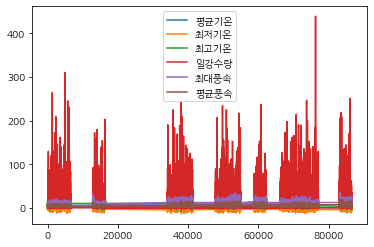

In [44]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

df_busa.plot()
plt.show()

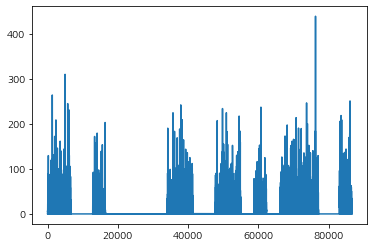

In [45]:
df_busa['일강수량'].plot()
plt.show()

- matplotlib 모듈을 이용한 시각화
- 참조: https://matplotlib.org/stable/index.html

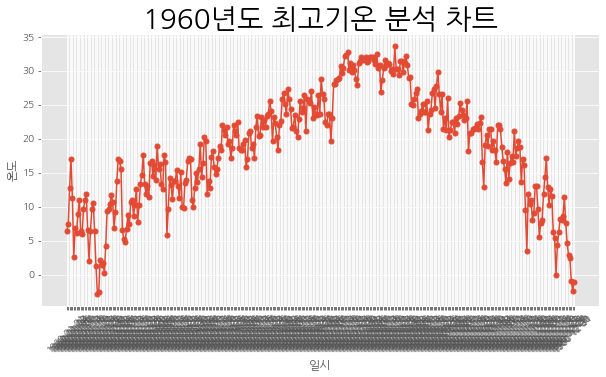

In [47]:
plt_df1=df_busa[(df_busa['일시']>="1960-01-01") & (df_busa['일시']<="1960-12-31")]

# 차트 환경 설정
plt.style.use("ggplot")  # 스타일 선택
plt.figure(figsize=(10, 5))  # 차트 사이즈
plt.xticks(size=9, rotation=45)

# 차트 출력
plt.plot(plt_df1['일시'], plt_df1['최고기온'], marker="o", markersize=5) # x축: 일시, y축: 최고기온
plt.title('1960년도 최고기온 분석 차트', size=28)  # 제목 입력, 글자크기 28
plt.xlabel('일시')
plt.ylabel('온도')
plt.show()

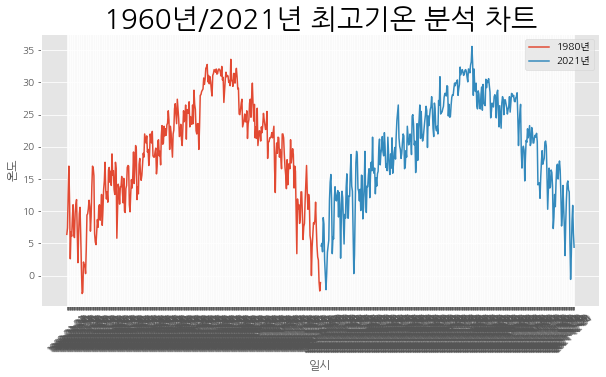

In [50]:
# 한개의 차트에 두 데이터 표시
plt_df1=df_busa[(df_busa['일시']>="1960-01-01") & (df_busa['일시']<="1960-12-31")]
plt_df2=df_busa[(df_busa['일시']>="2021-01-01") & (df_busa['일시']<="2021-12-31")]

# 차트 환경 설정
plt.style.use("ggplot")  # 스타일 선택
plt.figure(figsize=(10, 5))  # 차트 사이즈
plt.xticks(size=9, rotation=45)

# 차트 출력
plt.plot(plt_df1['일시'], plt_df1['최고기온'], label='1980년') # label : 범례
plt.plot(plt_df2['일시'], plt_df2['최고기온'], label='2021년') 

plt.title('1960년/2021년 최고기온 분석 차트', size=28)  # 제목 입력, 글자크기 28
plt.xlabel('일시')
plt.ylabel('온도')
plt.legend()
plt.show()

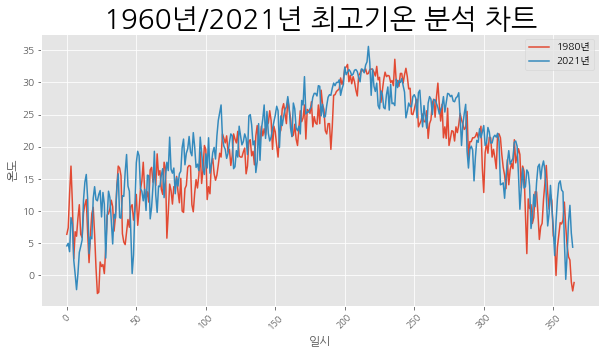

In [52]:
# 한개의 차트에 두 데이터 표시
# 원하는 데이터 추출
plt_df1=df_busa[(df_busa['일시']>="1960-01-01") & (df_busa['일시']<="1960-12-31")]
plt_df2=df_busa[(df_busa['일시']>="2021-01-01") & (df_busa['일시']<="2021-12-31")]

# 추출한 데이터에 대한 index 재설정
plt_df1 = plt_df1.reset_index(drop=True)
plt_df2 = plt_df2.reset_index(drop=True)


# 차트 환경 설정
plt.style.use("ggplot")  # 스타일 선택
plt.figure(figsize=(10, 5))  # 차트 사이즈
plt.xticks(size=9, rotation=45)

# 차트 출력
plt.plot(plt_df1.index, plt_df1['최고기온'], label='1980년') # label : 범례
plt.plot(plt_df2.index, plt_df2['최고기온'], label='2021년') 

plt.title('1960년/2021년 최고기온 분석 차트', size=28)  # 제목 입력, 글자크기 28
plt.xlabel('일시')
plt.ylabel('온도')
plt.legend()
plt.show()

#### 년도별 월별 평균 기온을 이용한 차트 작성

In [77]:
print(df1['일시'][0].split("-"))
print(df1['일시'][0][3].split("-"))
print(df1['일시'].str.split("-")[0][0])

['2014', '01', '01']
['4']
2014


In [84]:
# 일시를 이용해 년, 월, 일 필드 생성
df1['년']=df1['일시'].str.split('-')[0][0]
df1.head()

,지점명,일시,평균기온,최저기온,최고기온,일강수량,최대풍속,평균풍속,년
0,부산,2014-01-01,7.3,4.9,9.9,0.0,8.7,5.3,2014
1,부산,2014-01-02,7.4,3.8,12.0,0.0,5.8,2.7,2014
2,부산,2014-01-03,8.1,5.1,13.5,0.0,5.0,2.4,2014
3,부산,2014-01-04,7.4,4.6,12.4,0.0,5.8,2.7,2014
4,부산,2014-01-05,6.5,3.5,11.3,0.0,5.8,2.9,2014


In [89]:
# 일시를 이용해 년, 월, 일 필드 생성
# 참고만 하세요. -> 오래 걸려요
년=[]; 월=[]

for i in df1.index:
    년.append(df1['일시'].str.split('-')[i][0])
    월.append(df1['일시'].str.split('-')[i][1])

df1['년']=년
df1['월']=월
df1.head()

KeyboardInterrupt: ignored

In [91]:
# DataFrame에서 직접 적용
df_busa['년']=df_busa['일시'].str.split("-").str[0]
df_busa['월']=df_busa['일시'].str.split("-").str[1]

display(df_busa.head(3))
display(df_busa.tail(3))

,지점명,일시,평균기온,최저기온,최고기온,일강수량,최대풍속,평균풍속,년,월
83027,부산,1904-04-09,11.3,7.8,16.1,14.8,12.3,9.6,1904,04
83028,부산,1904-04-10,9.3,4.7,15.2,0.0,8.4,4.3,1904,04
83029,부산,1904-04-11,10.6,4.7,14.9,1.0,6.0,3.7,1904,04


,지점명,일시,평균기온,최저기온,최고기온,일강수량,최대풍속,평균풍속,년,월
2965,부산,2022-02-13,8.9,6.5,14.5,0.0,5.1,3.2,2022,02
2966,부산,2022-02-14,9.0,6.1,13.7,0.0,6.2,3.4,2022,02
2967,부산,2022-02-15,2.6,-2.6,7.8,0.0,8.7,4.9,2022,02


In [81]:
df1.tail()

,지점명,일시,평균기온,최저기온,최고기온,일강수량,최대풍속,평균풍속,년
86576,부산,1913-12-27,3.8,0.5,7.2,0.0,10.0,4.7,2014
86577,부산,1913-12-28,2.5,-0.7,6.6,0.0,9.2,5.6,2014
86578,부산,1913-12-29,4.8,-1.6,11.2,0.0,11.6,4.6,2014
86579,부산,1913-12-30,1.1,-2.9,4.9,0.0,14.2,9.1,2014
86580,부산,1913-12-31,-0.7,-4.8,3.1,0.0,12.2,7.2,2014


In [79]:
#del df1['년']

### 년도별/월별 그룹 계산

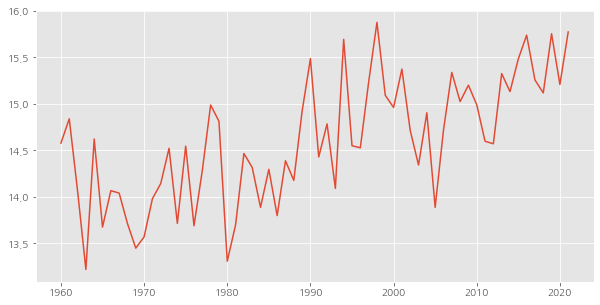

In [127]:
# 년도별 평균값 계산
plt_df=df_busa.groupby('년').mean()

plt_df=plt_df.reset_index()   # index 재설정후 년을 데이터로 변경
plt_df=plt_df.astype({'년':int})  # 년 필드를 정수형 데이터로 변경
tmp=plt_df[(plt_df['년']>=1960) & (plt_df['년']<=2021)]   # 1960년 데이터 이후 데이터 검색(2022년은 4월까지 있음)

plt.figure(figsize=(10,5))
plt.plot(tmp['년'], tmp['평균기온'])

plt.show()

In [128]:
plt_df[plt_df['년']==2021]

,년,평균기온,최저기온,최고기온,일강수량,최대풍속,평균풍속
117,2021,15.771233,12.449863,19.959178,4.952877,6.467945,3.125205


##### 년도별/월별 평균 계산

In [129]:
plt_df=plt_df=df_busa.groupby(['년', '월']).mean() # 년/월 그룹 계산
plt_df=plt_df.reset_index() # 년/월 인덱스를 데이터로 이동후 인덱스 재설정

plt_df.dtypes

년        object
월        object
평균기온    float64
최저기온    float64
최고기온    float64
일강수량    float64
최대풍속    float64
평균풍속    float64
dtype: object

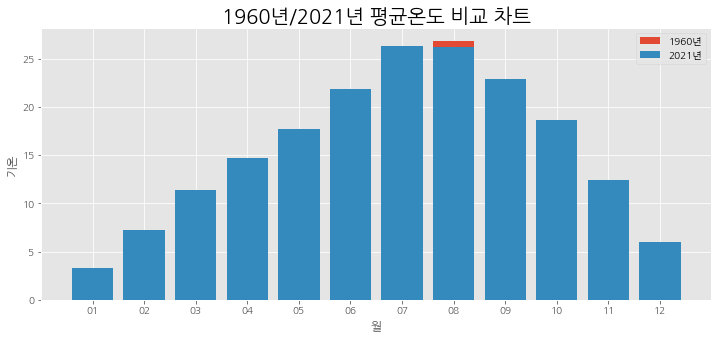

In [141]:
df1960=plt_df[plt_df['년']=='1960']
df2021=plt_df[plt_df['년']=='2021']

plt.figure(figsize=(12, 5))

plt.bar(df1960['월'],df1960['평균기온'], label='1960년')
plt.bar(df1960['월'],df2021['평균기온'], label='2021년')

plt.title('1960년/2021년 평균온도 비교 차트',size=20)
plt.xlabel('월')
plt.ylabel('기온')

plt.legend(loc='best')
plt.show()